In [71]:
%pylab inline
import matplotlib.pyplot as pl
from astropy.io import fits
from ngmix.medsreaders import NGMixMEDS
import numpy as np
import galsim
import fitsio
import meds

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/chihway/.conda/envs/shear_decade/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['exp']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [72]:
# download files
# download catalogs too?
# spot check images, weights, masks -- lay out in easy inspection way (band)
# check high S/N

In [73]:
decade_dir='/project2/chihway/data/decade/decade.ncsa.illinois.edu/deca_archive/DEC/multiepoch/shear/r5765/'
File_list = ['DES1213-3457', 'DES1224-3749', 'DES1225-4206', 'DES1318-3623', 'DES1319-3457']

In [98]:
i=4

XX = []
for band in ['g','r','i','z']:
    
    X = meds.MEDS(decade_dir+File_list[i]+'/p01/meds/'+File_list[i]+'_r5765p01_'+band+'_meds-shear.fits.fz')
    if band == 'g':
        print('Tile '+File_list[i][:11]+' has '+str(X.size)+' objects')
        
    XX.append(X)

Tile DES1319-345 has 43726 objects


In [99]:
meds_cat = XX[0].get_cat()
print(meds_cat['ra'])
print(meds_cat['dec'])

[199.89997744 199.49358107 200.19798183 ... 199.55460339 199.67922068
 199.42666021]
[-35.32906315 -35.32852586 -35.32854267 ... -34.64395892 -34.60707631
 -34.64670371]


In [100]:
cat = fits.open(decade_dir+File_list[i]+'/p01/cat/'+File_list[i]+'_r5765p01_det_cat.fits')
cat_i = fits.open(decade_dir+File_list[i]+'/p01/cat/'+File_list[i]+'_r5765p01_i_cat.fits')

# cat = fits.open(decade_dir+File_list[i]+'/p01/cat/'+File_list[i]+'_r5765p01_g_cat.fits')

# print(cat[1].header.keys)
print(cat[1].data['ALPHAWIN_J2000'])
print(cat[1].data['DELTAWIN_J2000'])
# print(len(cat[1].data))

[199.89997542 199.49356418 200.19797199 ... 199.55465757 199.67921118
 199.42666713]
[-35.32909051 -35.32851431 -35.32856777 ... -34.64395723 -34.60708334
 -34.64670532]


In [101]:
# print(cat[1].header.keys)

In [102]:
np.random.seed(i+182475)
arr_0 = np.arange(XX[0].size)
flags = cat[1].data['flags']
mag_i = cat_i[1].data['MAG_AUTO']
arr = arr_0[(flags==0)*(mag_i<23.5)] # insert s/n and s/g cuts here?
print(len(arr_0), len(arr))
np.random.shuffle(arr)

43726 23584


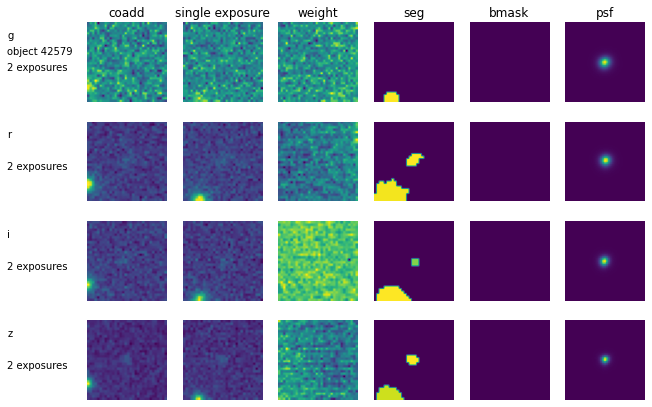

In [108]:
for ii in range(50):
    
    j = arr[ii]
    
    fig, axarr = pl.subplots(4, 6,figsize=(10,7))

    axarr[0,0].text(-1,0.8,'g',transform=axarr[0,0].transAxes)
    axarr[0,0].text(-1,0.6,'object '+str(j),transform=axarr[0,0].transAxes)
    axarr[1,0].text(-1,0.8,'r',transform=axarr[1,0].transAxes)
    axarr[2,0].text(-1,0.8,'i',transform=axarr[2,0].transAxes)
    axarr[3,0].text(-1,0.8,'z',transform=axarr[3,0].transAxes)
    
    axarr[0,0].set_title('coadd')
    axarr[0,1].set_title('single exposure')
    axarr[0,2].set_title('weight')
    axarr[0,3].set_title('seg')
    axarr[0,4].set_title('bmask')
    axarr[0,5].set_title('psf')

    
    for band in range(4):

        ncutout = XX[band]['ncutout'][j]
        axarr[band,0].text(-1,0.4,str(ncutout)+' exposures',transform=axarr[band,0].transAxes)

        # coadd
        images = XX[band].get_cutout(j,0)
        axarr[band,0].imshow(images)
        axarr[band,0].axis('off')

        if ncutout==1:
            exp = 0
        else:
            # random single exposure
            exp = np.random.randint(1,ncutout)
        images = XX[band].get_cutout(j,exp)
        axarr[band,1].imshow(images)
        axarr[band,1].axis('off')

        # weight
        images = XX[band].get_cutout(j,exp, type='weight')
        axarr[band,2].imshow(images)
        axarr[band,2].axis('off')

        # seg
        images = XX[band].get_cutout(j,exp, type='seg')
        axarr[band,3].imshow(images)
        axarr[band,3].axis('off')

        # bmask
        images = XX[band].get_cutout(j,exp, type='bmask')
        axarr[band,4].imshow(images)
        axarr[band,4].axis('off')

        # psf
        images = XX[band].get_psf(j,exp)
        axarr[band,5].imshow(images)
        axarr[band,5].axis('off')


    pl.savefig(File_list[i][:12]+'_test_'+str(ii)+'.pdf')

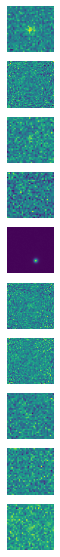

In [51]:
fig, axarr = pl.subplots(10, 1,figsize=(20,10))

arr = np.arange(X.size)
np.random.shuffle(arr)
for i in range(10):
    images = X.get_cutout(arr[i],3)
    axarr[i].imshow(images.T)
    axarr[i].axis('off')
plt.subplots_adjust(left=0)

# coadd, random exposure, mask, weight, print number of exp, band, PSF

In [ ]:
# comment on what is found, send to channel 